# Exercise 02

* Estimate the unknown distribution using a mixture of $K$ Gaussians and plot the result. You are free to choose the number $K$ of Gaussian components in the mixture. Fit the distribution using either existing code or implement the maximum likelihood solution of the model yourself. Comment on the results.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm
import matplotlib as mpl

## Reading the data and initializing components.

The dataset is composed by 2000 points that are divided in two components that were created using a polar coordinate system strategy: As the radius and the angle grow, the spread of the data also grow.

We will then use as initial means 10 points, five in each component that separated by some interval of radius and angle (Note that we could change the number of components just by altering the argument of the range function).

In [2]:
df = pd.read_csv('data.csv', header=None)

10


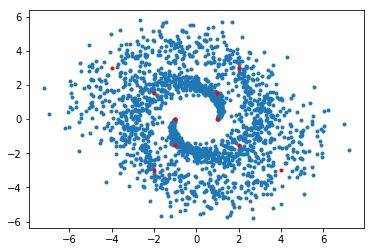

In [3]:
arr = df.values
plt.plot([x[0] for x in arr], [x[1] for x in arr], '.')

r = 0
phi = 0

pos_point = np.array([1,0])
pos_points = [pos_point]

neg_point = np.array([-1, 0])
neg_points = [neg_point]

for x in range(4):
    phi += math.pi/2
    r += 1.5
    
    pos_point = pos_point + np.array([r*math.cos(phi), r*math.sin(phi)])
    pos_points.append(pos_point)
    
    neg_point = neg_point - np.array([r*math.cos(phi), r*math.sin(phi)])
    neg_points.append(neg_point)

points = []
points += neg_points
points += pos_points
print(len(points))

plt.plot([x[0] for x in points], [x[1] for x in points], 'r.')

## Fitting the model

We will use the GaussianMixture class from scikit-learn. It implements the GMM using the expectation maximization algorithm to fit the model. We can pass directly the means we want to initialize the model and fit it to the data.

In [4]:
gmm = GaussianMixture(n_components=len(points), means_init=points)
gmm.fit(arr)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=array([[-1. ,  0. ],
       [-1. , -1.5],
       [ 2. , -1.5],
       [ 2. ,  3. ],
       [-4. ,  3. ],
       [ 1. ,  0. ],
       [ 1. ,  1.5],
       [-2. ,  1.5],
       [-2. , -3. ],
       [ 4. , -3. ]]),
        n_components=10, n_init=1, precisions_init=None, random_state=None,
        reg_covar=1e-06, tol=0.001, verbose=0, verbose_interval=10,
        warm_start=False, weights_init=None)

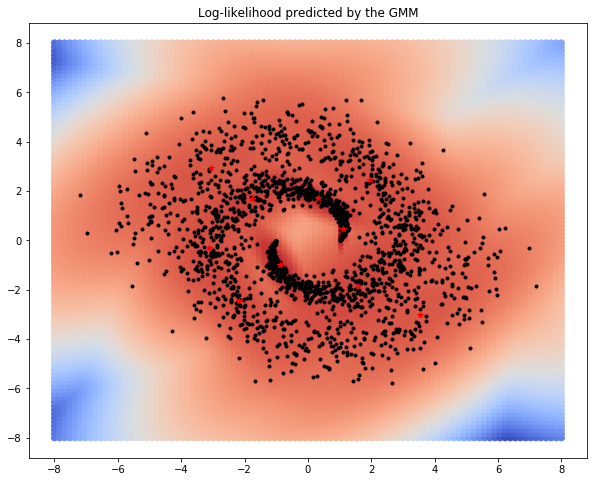

In [5]:
x = np.linspace(-8., 8., 100)
y = np.linspace(-8., 8., 100)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape(X.shape)

plt.figure(figsize=(10,8))
plt.scatter(X, Y, c=Z, cmap=mpl.cm.coolwarm)
plt.plot(arr[:, 0], arr[:, 1], 'k.')
plt.plot([x[0] for x in gmm.means_], [x[1] for x in gmm.means_], 'r*')

plt.title('Log-likelihood predicted by the GMM')
plt.axis('tight')
plt.show()

The components found by the EM algorithm were:

In [6]:
i = 1
for mean, cova, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
    print("Gaussian {}".format(i))
    print('Mean:')
    print(mean)
    print("\nCovariance matrix:")
    print(cova)
    print("\nWeight:")
    print(w)
    print("\n\n")
    i+=1


Gaussian 1
Mean:
[-3.11398312 -0.29269712]

Covariance matrix:
[[ 0.64486178  0.0229773 ]
 [ 0.0229773   1.3109886 ]]

Weight:
0.0695759453938



Gaussian 2
Mean:
[-0.88515712 -1.01257551]

Covariance matrix:
[[ 0.1349398  -0.18774647]
 [-0.18774647  0.42679445]]

Weight:
0.123126979185



Gaussian 3
Mean:
[ 1.59431272 -1.84909296]

Covariance matrix:
[[ 1.77314939  1.32506855]
 [ 1.32506855  2.05830283]]

Weight:
0.209329785229



Gaussian 4
Mean:
[ 1.96991651  2.45284981]

Covariance matrix:
[[ 2.05354763 -1.61677344]
 [-1.61677344  2.24786631]]

Weight:
0.125217397692



Gaussian 5
Mean:
[-3.05147846  2.95054938]

Covariance matrix:
[[ 2.82606978  1.61479499]
 [ 1.61479499  1.98484608]]

Weight:
0.10260904527



Gaussian 6
Mean:
[ 1.11267826  0.46488749]

Covariance matrix:
[[ 0.00383396  0.00842107]
 [ 0.00842107  0.09478047]]

Weight:
0.0570004085278



Gaussian 7
Mean:
[ 0.30148748  1.70237092]

Covariance matrix:
[[ 0.44593494 -0.24688733]
 [-0.24688733  0.19444292]]

Weight:
0.

* Plot the unknown distribution as estimated using $k$-NN with values of $k = \{1, 2, 4, 8, 16, 32, 64\}$. Fit the distribution using your implementation of the nearest-neighbour density estimator. Comment on the results.

The $k$-NN density estimator works by fixing a value of $K$ in the equation $$p(x) = \frac{K}{NV}$$ and use the data to find the value for $V$, which will be the volume of the sphere that contains the point $x$ with its $k$ nearest neighbors. The sphere in question will be the one with radius equal to the distance of the point $x$ to its $k$th nearest neighbor. We then estimate it by:

In [7]:
def knn_density_estimation(x, points, k):
    N = len(points)
    r = find_radius(x, points, k)
    V = math.pi*(r**2)
    return k/(N*V)
    
def find_radius(x, points, k):
    dists = [np.linalg.norm(point - x) for point in points]
    dists.sort()
    return dists[k-1]

print(knn_density_estimation(np.array([-2, 2]), arr, 16))

0.0248908069678


In [8]:
def plot_density(k):
    x = np.linspace(-8., 8., 30)
    y = np.linspace(-8., 8., 30)
    X, Y = np.meshgrid(x, y)

    points = [np.array([xi, yi]) for xi in x for yi in y]

    Zc = np.array([knn_density_estimation(el, arr, k) for el in points])
    Zc = Zc.reshape(X.shape)

    plt.figure(figsize=(5,5))
    plt.scatter(X, Y, c=Zc, cmap=mpl.cm.Greys)
    #plt.plot(arr[:, 0], arr[:, 1], 'k.')

    plt.title('Probaility density predicted by the KNN with k = {}'.format(k))
    plt.axis('tight')
    plt.show()

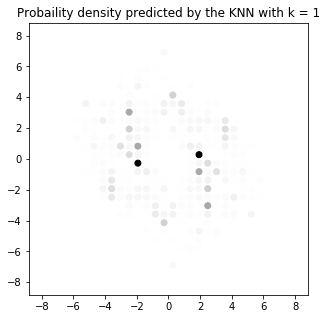

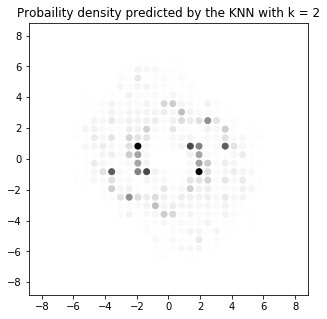

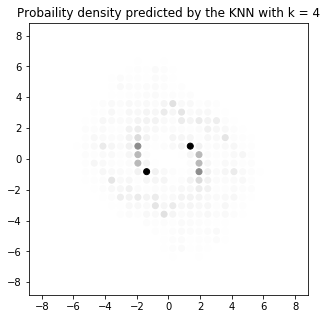

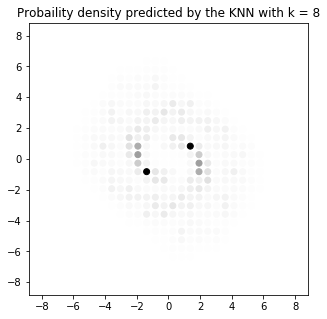

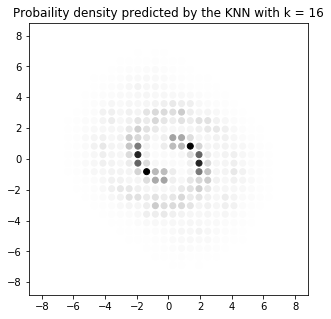

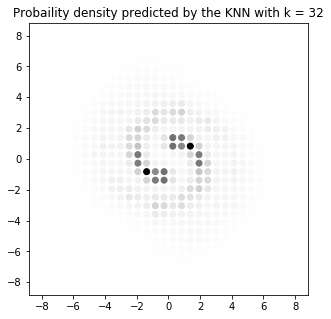

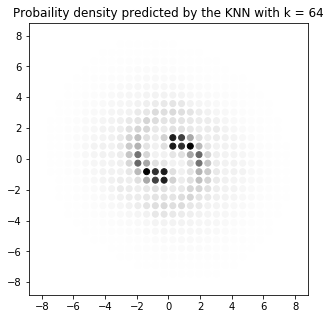

In [9]:
plot_density(1)
plot_density(2)
plot_density(4)
plot_density(8)
plot_density(16)
plot_density(32)
plot_density(64)